In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
results_participants = pd.read_csv('participant_results.csv')
correct_answers = pd.read_csv('correct_answers.csv')

In [101]:
accuracy_VAE = []
for i in range(results_participants.shape[0]):
    
    participant_correct_answers = np.sum(results_participants.iloc[i,2:32].to_numpy() == correct_answers.iloc[0:30,1])
    participant_total_answers = np.sum(results_participants.iloc[i,2:32]>0)
    accuracy_VAE.append(participant_correct_answers/participant_total_answers)

In [102]:
results_participants['accuracy_VAE'] = accuracy_VAE

In [103]:
accuracy_random = []
for i in range(results_participants.shape[0]):
    
    participant_correct_answers = np.sum(results_participants.iloc[i,32:62].to_numpy() == correct_answers.iloc[30:60,1])
    participant_total_answers = np.sum(results_participants.iloc[i,32:62]>0)
    accuracy_random.append(participant_correct_answers/participant_total_answers)

In [104]:
results_participants['accuracy_random'] = accuracy_random

In [108]:
results_participants['accuracy_random'].mean()
results_participants['accuracy_VAE'].mean()

0.537861058694392

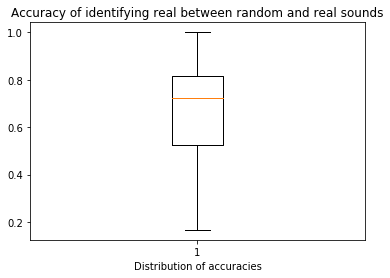

In [115]:
plt.boxplot(accuracy_random)
plt.title('Accuracy of identifying real between random and real sounds')
plt.xlabel('Distribution of accuracies')
plt.show()

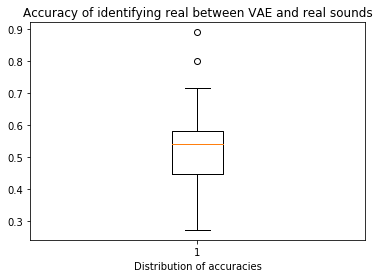

In [117]:
plt.boxplot(accuracy_VAE)
plt.title('Accuracy of identifying real between VAE and real sounds')
plt.xlabel('Distribution of accuracies')
plt.show()

In [118]:
results_participants

,id,synth_knowledge,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,...,RANDOM24,RANDOM25,RANDOM26,RANDOM27,RANDOM28,RANDOM29,RANDOM30,SC0,accuracy_VAE,accuracy_random
0,MakikoSadakata,4,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,2.0,NaN,12,0.583333,0.500000
1,s4603478,2,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,2.0,5,0.500000,0.166667
2,s1042459,2,NaN,NaN,2.0,2.0,NaN,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,15,0.538462,1.000000
3,s1047701,5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,2.0,NaN,9,0.800000,0.600000
4,s4715098,2,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,2.0,10,0.363636,0.333333
5,s4349792,1,NaN,NaN,2.0,1.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,12,0.700000,0.800000
6,s1057570,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,2.0,1.0,NaN,1.0,NaN,16,0.714286,0.846154
7,s1019474,1,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,1.0,2.0,1.0,1.0,NaN,1.0,12,0.444444,0.818182
8,u179070,5,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,13,0.454545,0.777778
9,s1028966,3,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,13,0.363636,0.777778
